## Load libraries

This little code block loads up some cool data-related libraries that we'll need.

In [2]:
import numpy as np # Numerical library
import matplotlib.pyplot as plt # Plotting library
import pandas as pd # Excel-on-crack library
import tkinter as tk #Dialog box for getting file
from tkinter import filedialog as fd 
import os #for parsing filename

## Read multiple CSVs
These CSVs should be the ones exported from ChemStation using the SaveCSV.mac macro

In [34]:

root=tk.Tk()
filename = fd.askopenfilenames()
root.destroy()
#print(filename)
nfiles = len(filename)
nfiles



11

In [89]:
name = []
chrom = []
wavelength = []
for file in range(0,nfiles):
    temp = os.path.basename(filename[file])
    name.append(temp[10:-12])
    #print(name)

    chrom.append(pd.read_csv(filename[file], header = 1, delimiter = ' , ', encoding = 'UTF-16', engine = 'python'))

    temp =  pd.read_csv(filename[file], nrows = 0, delimiter = ' , ', encoding = 'UTF-16', engine = 'python')
    temp = temp.to_string()
    wavelength.append(temp[38:-21]) # need more elegant solution

    
for n in range(1,len(name)): # Print out list of sample names
    print(str(n) + ': ' + name[n])



1: MeOH_Blank
2: 8-FDC_20200302
3: 8-FDC_20200302
4: 8-FDC_20200226_RT
5: 8-FDC_20200226_Fridge20200226
6: clp-3-026-8FDC_Crude8
7: clp-3-027-Me8FDC_column
8: clp-3-026-Me8FDC_unpurified
9: MeOH_Blank
10: 8-FDC_20200302


## Plot chromatograms separately


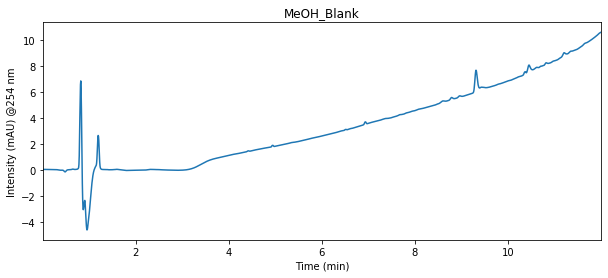

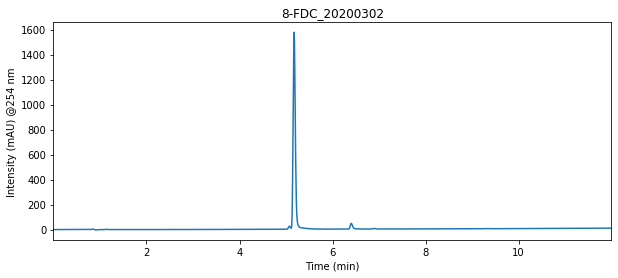

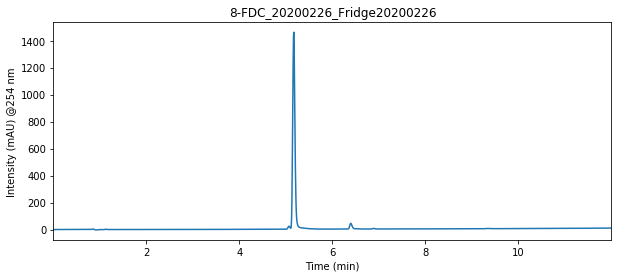

In [58]:
ind = [1, 3, 5]

for i in ind:
    plt.figure(figsize=(10,4))

    plt.plot(chrom[i]['Time (min)'],chrom[i]['Absorbance (mAu)'])


    plt.xlabel('Time (min)')
    plt.ylabel('Intensity (mAU) @' + wavelength[1] + ' nm')
    plt.title(name[i])



    plt.rcParams.update({"axes.facecolor" : "white", 
                         "axes.edgecolor":  "black"}) #set background to white and axes to black
    plt.autoscale(enable=True, axis='x', tight=True) #autoscale the x axis

plt.show()

## Plot chromatograms separately


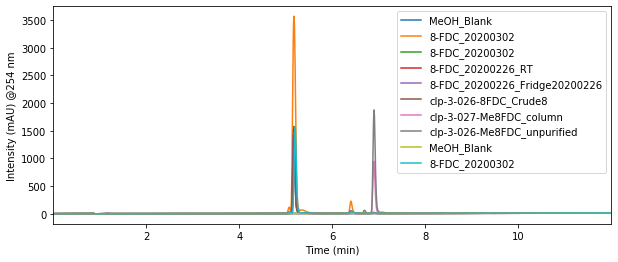

In [81]:
ind = [1, 2 5]

plt.figure(figsize=(10,4)) #Figure size in inches

for i in ind:
    plt.plot(chrom[i]['Time (min)'],chrom[i]['Absorbance (mAu)'], label=name[i])

    plt.xlabel('Time (min)')
    plt.ylabel('Intensity (mAU) @' + wavelength[1] + ' nm')
    



    plt.rcParams.update({"axes.facecolor" : "white", 
                        "axes.edgecolor":  "black"}) #set background to white and axes to black
    plt.autoscale(enable=True, axis='x', tight=True) #autoscale the x axis
    
plt.legend()
plt.show()